<a href="https://colab.research.google.com/github/mohithxoxo/Projects/blob/master/Video_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!wget https://github.com/mozilla/DeepSpeech/releases/download/v0.8.2/deepspeech-0.8.2-models.pbmm #180MB
!wget https://github.com/mozilla/DeepSpeech/releases/download/v0.8.2/deepspeech-0.8.2-models.scorer #909MB

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.5).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 21 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 2s (112 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 144619 files and directories currently installed.)
Preparing to 

In [2]:
!pip install wget
!pip install easyocr
!pip install pafy
!pip install youtube-dl
!pip install deepspeech==0.8.2

from deepspeech import Model
import numpy as np
import wave
import pandas as pd
import numpy as np
import wget
import easyocr
import pafy
from textblob import TextBlob

from IPython.display import Audio , Image
from IPython.display import YouTubeVideo
from IPython.display import clear_output


  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=e935b63d98742b0fd0d7924dc7f039519bf3d7cd6be994f36a3f43eb0f3350fc
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
     |████████████████████████████████| 48.4MB 63kB/s 
     |████████████████████████████████| 1.8MB 2.7MB/s 
     |████████████████████████████████| 8.3MB 2.7MB/s 


# **Configurations**

In [3]:
model_file_path = 'deepspeech-0.8.2-models.pbmm'
lm_file_path = 'deepspeech-0.8.2-models.scorer'
beam_width = 100
lm_alpha = 0.93
lm_beta = 1.18

model = Model(model_file_path)
model.enableExternalScorer(lm_file_path)
model.setScorerAlphaBeta(lm_alpha, lm_beta)
model.setBeamWidth(beam_width)
stream = model.createStream()

In [4]:
def read_wav_file(filename):
    with wave.open(filename, 'rb') as w:
        rate = w.getframerate()
        frames = w.getnframes()
        buffer = w.readframes(frames)
    return buffer, rate

def transcribe_streaming(audio_file):
    stream = model.createStream()
    buffer, rate = read_wav_file(audio_file)
    offset=0
    batch_size=8196
    text=''

    while offset < len(buffer):
      end_offset=offset+batch_size
      chunk=buffer[offset:end_offset]
      data16 = np.frombuffer(chunk, dtype=np.int16)

      stream.feedAudioContent(data16)
      text=stream.intermediateDecode()
      clear_output(wait=True)
      print(text)
      offset=end_offset
    return text

# **CONVERT VIDEO TO AUDIO FILE**

In [5]:
Ytube_ID = 'E9lAeMz1DaM'
URL = 'https://www.youtube.com/watch\?v\='+ Ytube_ID
!youtube-dl --extract-audio --audio-format wav -o "au.%(ext)s" $URL
!ffmpeg -i au.wav -vn -ar 16000 -ac 1 -y au_ds.wav
Audio('au_ds.wav')

[youtube] E9lAeMz1DaM: Downloading webpage
[youtube] E9lAeMz1DaM: Downloading MPD manifest
[dashsegments] Total fragments: 5
[download] Destination: au.webm
[download] 100% of 595.10KiB in 00:00
[ffmpeg] Destination: au.wav
Deleting original file au.webm (pass -k to keep)
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enab

# **CONVERTING VIDEO TO AUDIO and AUDIO TO TEXT**

In [6]:
reader =  easyocr.Reader(['en'])
def PAFY(VIDEO_URL,THUMBNAIL):
  video = pafy.new(VIDEO_URL.replace('\\',''))
  t = video.title
  a = video.author
  d = video.duration
  r = video.rating
  v = video.viewcount
  id = video.videoid
  b = reader.readtext(THUMBNAIL,width_ths=0.7,link_threshold=0.8,detail=0)
  l = 'https://www.youtube.com/watch\?v\='+ Ytube_ID
  !youtube-dl --extract-audio --audio-format wav -o "au.%(ext)s" $video_url
  !ffmpeg -i au.wav -vn -ar 16000 -ac 1 -y au_ds.wav
  t_s = transcribe_streaming('au_ds.wav')
  return id,t, a, d, r, v ,b,t_s

In [7]:
dataset = []

https://img.youtube.com/vi/yeWiEY9jHwE/hqdefault.jpg


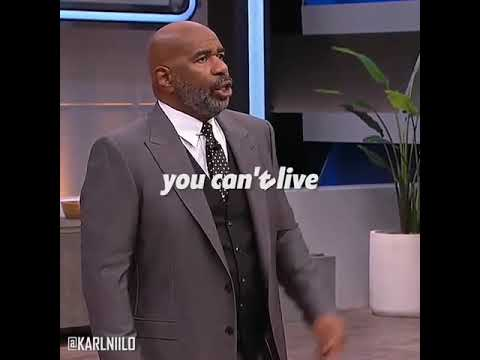

In [8]:
Ytube_ID = 'yeWiEY9jHwE'
video_url = 'https://www.youtube.com/watch?v='+Ytube_ID
thumbnail_url = 'https://img.youtube.com/vi/'+Ytube_ID+'/hqdefault.jpg'
print(thumbnail_url)
thumbnail = wget.download(thumbnail_url)
Image(thumbnail)

In [9]:
data = PAFY(video_url,thumbnail_url)
d = []
d =  list(data)
dataset.append(d)
DF = pd.DataFrame(dataset,columns=['ID','TITLE','AUTHOR','DURATION','RATING','VIEWS_COUNT','THUMBNAIL_TEXT','AUDIO_TEXT'])

which people do see it hours a day that's a tory liferent four hours in a day you cannot be sweepingly the morning telenosis


In [10]:
DF

,ID,TITLE,AUTHOR,DURATION,RATING,VIEWS_COUNT,THUMBNAIL_TEXT,AUDIO_TEXT
0,yeWiEY9jHwE,30 sec #High #motivational video || #inspirati...,MIND of Millionaire,00:00:30,5.0,5246,"[you can'elive, EKARLNIILD]",which people do see it hours a day that's a to...


In [11]:
#With Multiple Youtube ID's
dataset = []
y_list = ['zq2SXgVQz80','rGHrKkieqCY','shaxsCZ8r6I','nlMuHtV82q8','3fx6eo-Ijmc','ji9Nm3If1K8','Xf3LA404x_k'] #Each 30sec video

In [12]:
for i in range(0,len(y_list)):
  Ytube_ID = y_list[i]
  video_url = 'https://www.youtube.com/watch?v='+Ytube_ID
  thumbnail_url = 'https://img.youtube.com/vi/'+Ytube_ID+'/hqdefault.jpg'
  print(thumbnail_url)
  thumbnail = wget.download(thumbnail_url)
  Image(thumbnail)
  data = PAFY(video_url,thumbnail_url)
  d = []
  d =  list(data)
  dataset.append(d)
  DF = pd.DataFrame(dataset,columns=['ID','TITLE','AUTHOR','DURATION','RATING','VIEWS_COUNT','THUMBNAIL_TEXT','AUDIO_TEXT'])

as no losing only learned is no failure only opportunities in this no problems alisoun cotoneaster is failures the moderatus aliande with her and come back bigotedly doing the right direction see if you always win in the odomantians what it is to win it he battak the losses you got to take those hits is got to be the valet to peach the uptown when you does happen you go wow


In [13]:
DF

,ID,TITLE,AUTHOR,DURATION,RATING,VIEWS_COUNT,THUMBNAIL_TEXT,AUDIO_TEXT
0,zq2SXgVQz80,"Best 30 second's motivational video ,Never giv...",amith rv,00:00:26,4.883495,10661,[NEVERLIEUP],festoon the first thing i built i also built c...
1,rGHrKkieqCY,World best motivation video (WhatsApp status ...,WHATSAPP VIDEOS,00:00:29,4.950302,166705,[DREAM BIG AND DARE TO FAIL],hesitation struggle fight negations hated the ...
2,shaxsCZ8r6I,Success motivational status in english | Motiv...,Success Professor,00:00:31,4.887324,3288,"[My Chance Will Come,, LL]",i eireannaigh i do or i redhaired i paradiseid...
3,nlMuHtV82q8,30 Second Motivational Video (Effort feat. Ray...,b t,00:00:35,4.872340,26334,"[BACK OFF, DON]",there's the one sin of pain that the suffering...
4,3fx6eo-Ijmc,English motivation speech status | what's app ...,Vinoth B,00:00:23,4.971788,90670,"[YouTube, Status, NBv, AWAY, FROM, YOUR, LIFE]",the leethwaite can walk away from your life le...
5,ji9Nm3If1K8,English Inspiration Speech Status || Best Engl...,Dinesh Patel,00:00:30,4.976424,15228,[enjoy life ofhappiness],i just feel good in ashantee he i mean who was...
6,Xf3LA404x_k,"""Only Learning"" - Pitbull Motivational Speech 💔",Zahid Raza Ch,00:00:30,4.964286,33891,"[dprlal"", there is no failer, only opportunities]",as no losing only learned is no failure only o...


# **AUDIO TO TEXT WITH TIMESTEP**

In [14]:
def transcribe(x):
  buffer, rate = read_wav_file(x)
  data16= np.frombuffer(buffer,dtype=np.int16)
  return model.sttWithMetadata(data16)

transcribe('/content/au_ds.wav')

Metadata(transcripts=[
  CandidateTranscript(confidence=-988.1779174804688, tokens=[
    TokenMetadata(text='a', timestep=30, start_time=0.5999999642372131),
    TokenMetadata(text='s', timestep=37, start_time=0.7400000095367432),
    TokenMetadata(text=' ', timestep=40, start_time=0.7999999523162842),
    TokenMetadata(text='n', timestep=42, start_time=0.8399999737739563),
    TokenMetadata(text='o', timestep=44, start_time=0.8799999952316284),
    TokenMetadata(text=' ', timestep=49, start_time=0.9799999594688416),
    TokenMetadata(text='l', timestep=51, start_time=1.0199999809265137),
    TokenMetadata(text='o', timestep=54, start_time=1.0799999237060547),
    TokenMetadata(text='s', timestep=58, start_time=1.159999966621399),
    TokenMetadata(text='i', timestep=64, start_time=1.2799999713897705),
    TokenMetadata(text='n', timestep=66, start_time=1.3199999332427979),
    TokenMetadata(text='g', timestep=67, start_time=1.3399999141693115),
    TokenMetadata(text=' ', timestep=93,

# **ANALYTICS**

In [119]:
DF.head(2)

,ID,TITLE,AUTHOR,DURATION,RATING,VIEWS_COUNT,THUMBNAIL_TEXT,AUDIO_TEXT
0,zq2SXgVQz80,"Best 30 second's motivational video ,Never giv...",amith rv,00:00:26,4.883495,10661,[NEVERLIEUP],festoon the first thing i built i also built c...
1,rGHrKkieqCY,World best motivation video (WhatsApp status ...,WHATSAPP VIDEOS,00:00:29,4.950302,166705,[DREAM BIG AND DARE TO FAIL],hesitation struggle fight negations hated the ...


In [ ]:
DF['SENTIEMNTAL SCORE'] = None
DF['SENTIEMNTAL ANALYSIS'] = None
for i in range(0,DF.shape[0]):  
  op = TextBlob(DF['AUDIO_TEXT'][i])
  DF['SENTIEMNTAL SCORE'][i] = op.sentiment.polarity

DF['SENTIEMNTAL ANALYSIS'].values[DF['SENTIEMNTAL SCORE'] > 0] = 'Postive'
DF['SENTIEMNTAL ANALYSIS'].values[DF['SENTIEMNTAL SCORE'] <= 0] = 'Negative'

In [121]:
DF

,ID,TITLE,AUTHOR,DURATION,RATING,VIEWS_COUNT,THUMBNAIL_TEXT,AUDIO_TEXT,SENTIEMNTAL SCORE,SENTIEMNTAL ANALYSIS
0,zq2SXgVQz80,"Best 30 second's motivational video ,Never giv...",amith rv,00:00:26,4.883495,10661,[NEVERLIEUP],festoon the first thing i built i also built c...,0.416667,Postive
1,rGHrKkieqCY,World best motivation video (WhatsApp status ...,WHATSAPP VIDEOS,00:00:29,4.950302,166705,[DREAM BIG AND DARE TO FAIL],hesitation struggle fight negations hated the ...,-0.325,Negative
2,shaxsCZ8r6I,Success motivational status in english | Motiv...,Success Professor,00:00:31,4.887324,3288,"[My Chance Will Come,, LL]",i eireannaigh i do or i redhaired i paradiseid...,1,Postive
3,nlMuHtV82q8,30 Second Motivational Video (Effort feat. Ray...,b t,00:00:35,4.872340,26334,"[BACK OFF, DON]",there's the one sin of pain that the suffering...,0.25,Postive
4,3fx6eo-Ijmc,English motivation speech status | what's app ...,Vinoth B,00:00:23,4.971788,90670,"[YouTube, Status, NBv, AWAY, FROM, YOUR, LIFE]",the leethwaite can walk away from your life le...,0.15,Postive
5,ji9Nm3If1K8,English Inspiration Speech Status || Best Engl...,Dinesh Patel,00:00:30,4.976424,15228,[enjoy life ofhappiness],i just feel good in ashantee he i mean who was...,0.19375,Postive
6,Xf3LA404x_k,"""Only Learning"" - Pitbull Motivational Speech 💔",Zahid Raza Ch,00:00:30,4.964286,33891,"[dprlal"", there is no failer, only opportunities]",as no losing only learned is no failure only o...,0.268006,Postive


# **SEARCH PARTICULAR WORD**

In [205]:
subs = input()
for i in range(0,DF.shape[0]):
  if subs in str(DF['AUDIO_TEXT'][i]):
    print('Found')
    break
  else:
    pass
DF.iloc[i:i+1,:]

pain
Found


,ID,TITLE,AUTHOR,DURATION,RATING,VIEWS_COUNT,THUMBNAIL_TEXT,AUDIO_TEXT,SENTIEMNTAL SCORE,SENTIEMNTAL ANALYSIS
3,nlMuHtV82q8,30 Second Motivational Video (Effort feat. Ray...,b t,00:00:35,4.87234,26334,"[BACK OFF, DON]",there's the one sin of pain that the suffering...,0.25,Postive
